<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/rvvZiR).**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

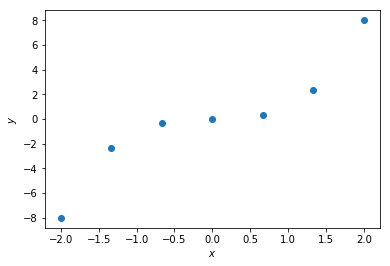

In [5]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

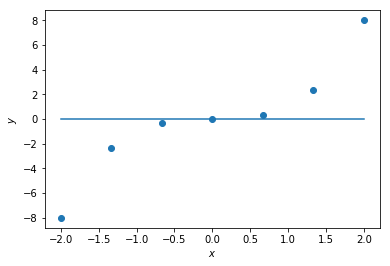

In [6]:
# Ваш код здесь
plt.scatter(X, y)
plt.plot([-2, 2], [np.mean(y), np.mean(y)])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

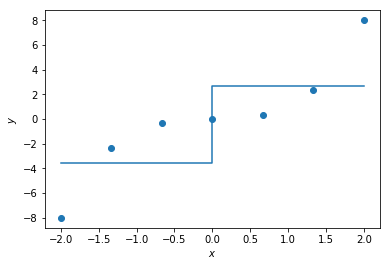

In [11]:
# Ваш код здесь
# Ваш код здесь
y1 = [y_cur for x_cur, y_cur in zip(X,y) if x_cur < 0]
y2 = [y_cur for x_cur, y_cur in zip(X,y) if x_cur >= 0]
plt.scatter(X, y)
plt.plot([-2,0, 0, 2], [np.mean(y1), np.mean(y1),np.mean(y2), np.mean(y2)])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [16]:
def regression_var_criterion(X, y, t):
    DX = np.var(y)
    y1 = [y_cur for x_cur, y_cur in zip(X,y) if x_cur < t]
    y2 = [y_cur for x_cur, y_cur in zip(X,y) if x_cur >= t]
    DXl = np.var(y1)
    DXr = np.var(y2)
    return DX - (float(len(y1))/len(y))*DXl - (float(len(y2))/len(y))*DXr

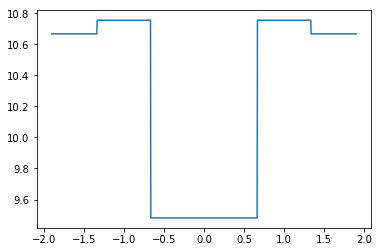

In [18]:
# Ваш код здесь
ts = np.linspace(-1.9, 1.9, 1000)
Qs = [regression_var_criterion(X, y, t) for t in ts]

plt.plot(ts, Qs)

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

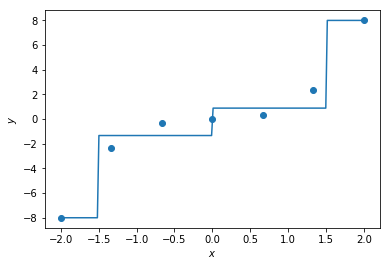

In [22]:

def func(x_c):
    y1 = [y_cur for x_cur, y_cur in zip(X,y) if x_cur < -1.5]
    y2 = [y_cur for x_cur, y_cur in zip(X,y) if -1.5 <= x_cur < 0]
    y3 = [y_cur for x_cur, y_cur in zip(X,y) if 0 <= x_cur < 1.5]
    y4 = [y_cur for x_cur, y_cur in zip(X,y) if 1.5 <= x_cur]
    if x_c < 0:
        if x_c < -1.5:
            return np.mean(y1)
        else:
            return np.mean(y2)
    else:
        if x_c < 1.5:
            return np.mean(y3)
        else:
            return np.mean(y4)
plt.scatter(X, y)
xs = np.linspace(-2, 2, 200)
ys = [func(x) for x in xs]
plt.plot(xs, ys)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

**<font color='red'>Вопрос 2.</font> Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [23]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [24]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах", а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`.

In [35]:
# Ваш код здесь
df['age_years'] = df['age']/365.25
df[['cholesterol1','cholesterol2', 'cholesterol3']] =  pd.get_dummies(df['cholesterol'])
df[['gluc1','gluc2', 'gluc3']] =  pd.get_dummies(df['gluc'])

In [43]:
df.drop(['cardio'], axis =1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,cholesterol1,cholesterol2,cholesterol3,gluc1,gluc2,gluc3
id,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,50.357290,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,55.381246,0,0,1,1,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,51.627652,0,0,1,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,48.249144,1,0,0,1,0,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,47.841205,1,0,0,1,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,59.997262,0,1,0,0,1,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,60.542094,0,0,1,1,0,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,61.831622,0,0,1,0,0,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,48.372348,1,0,0,1,0,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [44]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1), df[['cardio']],
                                                      test_size=0.3, random_state=17) # Ваш код здесь

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [46]:
X_train.columns

Index([u'age', u'gender', u'height', u'weight', u'ap_hi', u'ap_lo',
       u'cholesterol', u'gluc', u'smoke', u'alco', u'active', u'age_years',
       u'cholesterol1', u'cholesterol2', u'cholesterol3', u'gluc1', u'gluc2',
       u'gluc3'],
      dtype='object')

In [47]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
clf_tree.fit(X_train, y_train)


export_graphviz(clf_tree, feature_names=X_train.columns, 
out_file='../../img/age_tree.dot', filled=True)
!dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [99]:
# Ваш код здесь
from sklearn.metrics import accuracy_score
y_predict = clf_tree.predict(X_valid)
prev_score = accuracy_score(y_valid, y_predict)
prev_score

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [100]:
from sklearn.model_selection import GridSearchCV, cross_val_score
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(clf_tree, tree_params, cv=5, n_jobs=-1,
                        verbose=True)

In [101]:
y_train.as_matrix().ravel()

array([1, 1, 1, ..., 0, 0, 0])

In [102]:
tree_grid.fit(X_train.as_matrix(), y_train.as_matrix().ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

/home/pavel/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


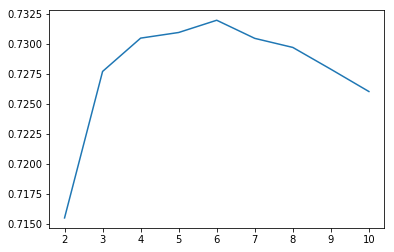

In [103]:
# Ваш код здесь
scores = [x[1] for x in tree_grid.grid_scores_]
plt.plot(list(range(2, 11)), scores)

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [107]:
# Ваш код здесь
print tree_grid.best_params_
y_predict = tree_grid.best_estimator_.predict(X_valid)
print accuracy_score(y_valid, y_predict) - prev_score

{'max_depth': 6}
0.00457142857143


**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева четкий пик, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке?**
- да, да
- да, нет
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках.

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [108]:
# Ваш код здесь
data = df[(45 <= df['age_years']) & (df['age_years'] < 50)]

In [126]:
data = pd.DataFrame()

In [143]:
data = df[['smoke', 'cholesterol1', 'cholesterol2','cholesterol3']]
data['male'] = df['gender'] - 1
data['age_1'] = [1 if 45 <= age < 50 else 0 for age in df['age_years'] ]
data['age_2'] = [1 if 50 <= age < 55 else 0 for age in df['age_years'] ]
data['age_3'] = [1 if 55 <= age < 60 else 0 for age in df['age_years'] ]
data['age_4'] = [1 if 60 <= age < 65 else 0 for age in df['age_years'] ]
data['ap_hi_1'] = [1 if 120 <= ap_hi < 140 else 0 for ap_hi in df['ap_hi'] ]
data['ap_hi_2'] = [1 if 140 <= ap_hi < 160 else 0 for ap_hi in df['ap_hi'] ]
data['ap_hi_3'] = [1 if 160 <= ap_hi < 180 else 0 for ap_hi in df['ap_hi'] ]

/home/pavel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/pavel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/pavel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [144]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)
clf_tree.fit(data, df['cardio'])


export_graphviz(clf_tree, feature_names=data.columns, 
out_file='../../img/age_tree.dot', filled=True)
!dot -Tpng '../../img/age_tree.dot' -o '../../img/age_tree.png'